# 第一部分：Milvus 初探 - 安装、概念与核心组件

欢迎来到 Milvus Workshop 的第一部分！在这一部分，我们将学习 Milvus 的基本概念以及安装实战。在开始之前，请确保您已经：
1. 安装 [Docker](https://docs.docker.com/get-started/get-docker/)
2. [检查硬件和软件要求](https://milvus.io/docs/zh/prerequisite-docker.md)
3. 安装 Python 3.8.5 或更高版本
4. 安装 pip

## 1.1 向量数据库 Milvus 概览
### 什么是向量嵌入 (Vector Embeddings)？
在机器学习和深度学习中，大多数模型只能处理数值型数据。但现实中，大量数据（如文本、图像、音频等）是非数值型的。为了将这些数据输入模型，就需要将它们转换成“数字”，这就是向量嵌入（Vector Embeddings）的作用。

经过嵌入，原始数据被转换成更易于操作的向量形式。向量这种表示方式，使得这些原始数据的语义相似性可以通过它们在向量空间中作为点的接近程度来量化。

总结：向量嵌入是将高维、离散或复杂的数据（如文本、图像或音频等）映射到低维连续向量空间的技术。它的本质是将数据转化为机器更易处理的形式，同时保留其内在规律，是现代 AI 系统的基石之一。

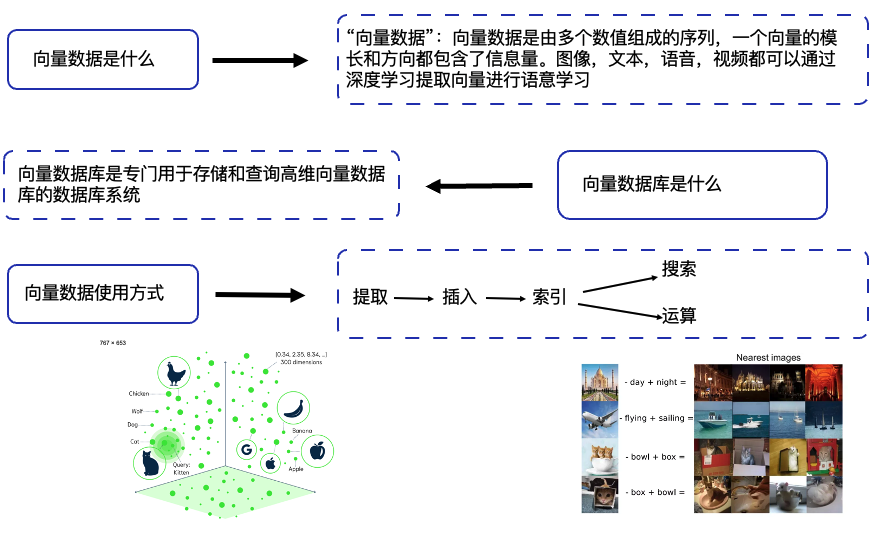

### 为什么需要向量数据库？
向量数据库是为了高效存储和管理海量非结构化数据并对其实现高效相似性搜索而设计的。
+ 传统数据库的局限

> 传统数据库侧重于精确匹配，向量数据库侧重于**语义搜索**（根据特定的距离度量查找与查询向量“最相似”的向量）。
>

| 方面 | 传统数据库 | 向量数据库 |
| --- | --- | --- |
| 数据类型 | 结构化数据（数值、字符串） | 高维浮点向量 |
| 查询方式 | 精确匹配、范围查询 | 相似度查询（根据欧式距离、余弦相似度等） |
| 索引机制 | B+树、哈希索引等 | HNSW、IVF、SCANN 等 ANN 索引 |
| 查询性能 | 查相似向量效率低 | 可在百万~亿级向量中快速查找 |


+ 典型应用场景

> 近似最近邻（Approximate Nearest Neighbor，ANN）搜索是向量数据库最基础的查询方法。它通过在一定程度上牺牲精确度，换取大幅提升的搜索速度和效率。
> 
> 向量数据库的 ANN 搜索能力使其成为 AI 时代的关键基础设施。   
>

| 场景 | 传统数据库的问题 | 向量数据库解决方案 |
| --- | --- | --- |
| 语义搜索 | 只能关键词匹配，无法理解语义 | 使用嵌入向量 Embedding 搜索相似含义的文本 |
| 推荐系统 | 依赖人工规则，难以捕捉用户兴趣 | 使用用户行为向量推荐相似商品/内容 |
| 图像/视频检索 | 无法直接搜索相似图片 | 使用向量提取图片特征检索相似图片 |
| 异常检测 | 规则引擎漏报率高 | 使用向量距离识别异常行为（如金融欺诈） |

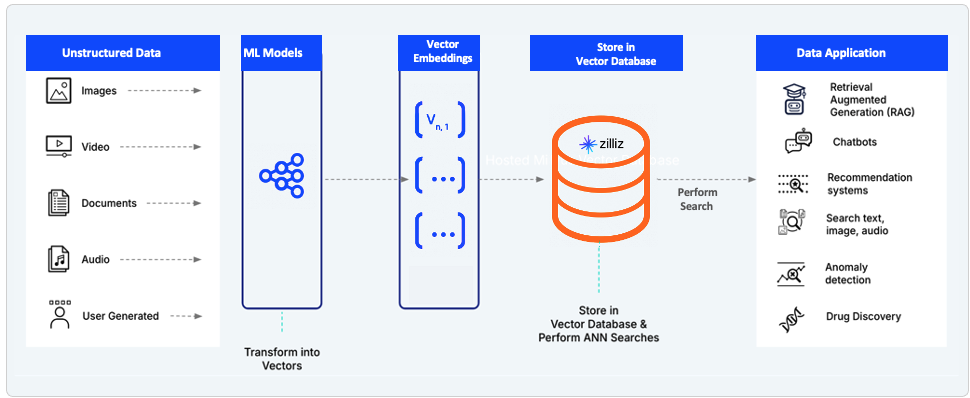

### Milvus 是什么？
Milvus 是一款开源的向量数据库，专门为高效存储、检索和分析大规模向量数据而设计。它支持多种机器学习模型生成的向量嵌入（Embeddings），广泛应用于 AI 、深度学习、推荐系统、图像/视频检索、自然语言处理（NLP）等场景。  

Milvus 有以下核心特点：
+ 高性能向量检索：
    - 支持亿级别的向量数据
    - 提供快速近似最近邻（ANN）搜索，大幅提高检索效率
    - 优化算法（IVF、HNSW 等）加速查询，平衡精度与速度
+ 支持多种数据类型：
    - 支持常见的数字和字符类型、各种向量类型、数组、集合和 JSON
+ 高扩展性：
    - 高度解耦的系统架构，可随数据的增长而不断扩展
    - 云原生设计，兼容 Kubernetes 等容器化部署
+ 多语言 SDK 与工具：
    - 提供 Python、Java、Go、C++ 等多语言 SDK
    - 集成工具链，例如 Milvus CLI、Attu 可视化工具
+ 开源 + 企业级支持： 
    - 由 Zilliz 公司主导开发并维护
    - 开源协议为 Apache 2.0，也提供商业版（Zilliz Cloud） 

### Milvus 核心概念解析
#### Collection (集合)
Collection 是一个二维表，具有列和行。每列代表一个字段（Field），每行代表一个实体（Entity）。它类似于关系型数据库中的表。

#### Schema (模式)
Schema 定义了 Collection 的数据结构，类似于关系型数据库的表结构定义。在创建一个 Collection 前，需要先定义它的 Schema。

一个完整的 Collection Schema 包含以下三部分：
+ Fields：定义字段的名称、数据类型、维度（向量）等属性；最多包含四个向量字段（Vector Field）和几个标量字段（Scalar Field）。
+ Primary Key：指定一个字段为主键（INT64 或 VARCHAR），用于唯一标识数据。
+ Description：可选的集合描述信息（文本字符串）。

#### Entity (实体)
Entity 是 Collection 中的一条数据记录，类似于关系型数据库中的一行。每个 Entity 包含一组字段（Fields）的值，这些字段由 Collection Schema 定义，包含 ID、向量字段和标量字段。

#### Index (索引)
Index 是优化向量相似性搜索（ANN，近似最近邻搜索）性能的核心机制。在 Milvus 中索引是特定于字段的，适用的索引类型因目标字段的数据类型而异。

Milvus 支持多种索引类型：

| 索引类型 | 适用场景 |
| --- | --- |
| FLAT | 小规模（百万级别）数据集，100% 召回率，精确搜索 |
| IVF_FLAT | 高速查询，平衡精度与速度 |
| IVF_SQ8 | 极高速查询，内存资源有限，可接受召回率略有下降 |
| HNSW | 极高速查询，要求尽可能高的召回率，内存资源大 |
| DISKANN | 基于磁盘上的检索，大型数据集 |


#### Search/Query (搜索/查询)
Milvus 支持高性能的 **ANN（近似最近邻）搜索** 与 **基于标量字段的过滤查询**，并可将二者结合，实现复杂的搜索场景。

**近似最近邻（ANN）搜索：**

近似近邻（ANN）搜索以记录向量嵌入排序顺序的索引文件为基础，根据接收到的搜索请求中携带的查询向量查找向量嵌入子集，将查询向量与子群中的向量进行比较，并返回最相似的结果。通过 ANN 搜索，Milvus 提供了高效的搜索体验。

在 ANN 搜索中支持：
+ **单向量搜索**：只涉及一个查询向量的搜索。根据预建索引和搜索请求中携带的度量类型，Milvus 将找到与查询向量最相似的前 K 个向量。
+ **批量向量搜索**：一个搜索请求中包含多个查询向量。Milvus 将并行对查询向量进行 ANN 搜索，并返回多组结果。
+ **在分区中进行 ANN 搜索**：假设一个 Collection 中有多个分区，可以在搜索请求中包含目标分区名称，将搜索范围限制在指定的分区内。减少搜索所涉及的分区数量可以提高搜索性能。
+ **使用输出字段**：在搜索结果中，Milvus 默认会包含包含 TOP-K 向量嵌入的实体的主字段值和相似度距离/分数。您可以在搜索请求中包含目标字段（包括向量和标量字段）的名称作为输出字段，使搜索结果携带这些实体中其他字段的值。
+ **使用限制和偏移**：搜索请求中包含的参数 limit 决定了搜索结果中包含的实体数量。该参数指定了单次搜索中返回实体的最大数量，通常称为 top-K。如果希望执行分页查询，可以使用循环来发送多个搜索请求，每个查询请求中都包含 Limit 和 Offset 参数。具体来说，可以将“限制”参数设置为希望包含在当前查询结果中的实体数量，将“偏移”参数设置为已经返回的实体总数。
+ **增强 ANN 搜索**：通过缩小搜索范围、提高搜索结果相关性和搜索结果多样化，Milvus 实现了过滤搜索、范围搜索、分组搜索、混合搜索等搜索增强功能。

**基于标量字段的过滤查询**：

除了 ANN 搜索，Milvus 还支持通过查询进行元数据过滤。Collections 可以存储各种类型的标量字段，你可以让 Milvus 根据一个或多个标量字段过滤实体。

Milvus 提供三种类型的查询：
+ 查询：通过主键过滤查找持有指定主键的实体。
+ 获取：通过过滤表达式查找符合自定义筛选条件的所有实体或指定数量的实体。
+ 查询迭代器：通过过滤表达式在分页查询中查找满足自定义筛选条件的所有实体。

**ANN 搜索与标量字段过滤的结合**：

Milvus 允许将两种查询方式结合使用，提供更灵活的查询能力：
+ 搜索前过滤：先过滤标量字段，再在结果子集上执行 ANN 搜索。
+ 搜索后过滤：先执行 ANN 搜索，再过滤结果中的标量字段。


#### Consistency Level (一致性级别)
作为一个分布式向量数据库，Milvus 提供了多种一致性级别来满足不同场景下的数据一致性需求。这些级别在数据可见性、系统性能和可用性之间提供了不同的权衡选择。

| 一致性级别 | 特点 |
| --- | --- |
| 强 | · 最高的一致性保证<br/>· 写入操作完成后，所有后续读取都能立即看到最新数据<br/>· 性能开销最大，查询延迟最高 |
| 有界 | · 默认使用的一致性级别<br/>· 允许数据在一定时间范围内有延迟（可配置），保证在指定时间后所有读取都能看到最新数据<br/>· 平衡了性能与一致性 |
| 会话 | · 保证单个会话内的读取一致性<br/>· 同一会话中能看到自己之前的所有写入，不同会话间可能有短暂不一致<br/>· 性能较好 |
| 最终 | · 最低的一致性保证<br/>· 不保证读取时能看到最新写入，最终所有节点数据会一致<br/>· 性能最好，查询延迟最低 |


#### Partition (分区)
分区是 Collection 的数据逻辑分组：
+ 创建一个 Collection 时，Milvus 也会在该 Collection 中创建一个名为 **_default** 的分区。如果不添加其他分区，所有插入到 Collection 中的实体都会进入默认分区，所有搜索和查询也都在默认分区内进行。
+ 可以添加更多分区，并根据特定条件将实体插入其中。这样就可以限制在某些分区内进行搜索和查询，从而提高搜索性能。
+ 一个 Collection 最多可以有 1024 个分区。

分区的核心功能：
+ 提高查询效率：缩小搜索范围，减少计算量。
+ 优化数据管理：可按时间、类别等维度组织数据；支持分区级操作（加载/释放/删除）。
+ 优化资源占用：只加载需要的分区到内存，减少不必要的资源占用。

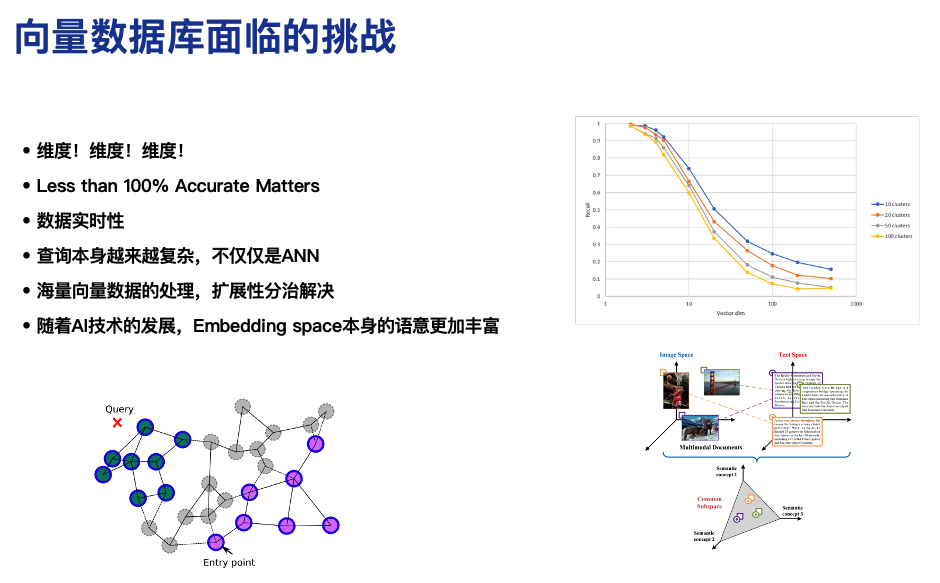